# Project Report – US Accidents Dataset Analysis

ICS 574 - Big Data Analytics Course Project

Submitted by Marwan Qomawi ID: g201657800.

## Objective

The goal of this project is to explore and analyze the US Accidents dataset, preprocess the data, and build classification models to predict the severity of accidents (binary: severe or not severe). This involves data cleaning, feature engineering, exploratory analysis, and the application of machine learning models to gain insights into the key contributing factors to traffic severity.

## 1. Selected Dataset

**Dataset Name:** US Accidents (March 2023 Sampled - 500K records)


**Link:**

- Original dataset: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

- Sampled (Currently using): https://drive.google.com/file/d/1U3u8QYzLjnEaSurtZfSAS_oh9AT2Mn8X


**Source:** Sampled dataset by the same author as the original Kaggle dataset.


**Description:** This dataset contains information about traffic accidents that occurred in the United States from 2016 to early 2023. Each record represents a single accident and includes features like time, location, weather, visibility, and more.


**Target Variable:** Severity (ranging from 1 to 4)

For simplicity, we are converting this to a binary classification task:

- Severity 1–2 → 0 (Low severity)

- Severity 3–4 → 1 (High severity)

**Feature Description**

| Feature              | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| `ID`                | Unique identifier for each accident.                                        |
| `Severity`          | Severity level (1–4) where 1 = least and 4 = most severe.                   |
| `Start_Time`        | Timestamp of when the accident started.                                     |
| `End_Time`          | Timestamp of when the accident ended.                                       |
| `Start_Lat`, `Start_Lng` | Latitude and Longitude where the accident occurred.                     |
| `Temperature(F)`    | Temperature in Fahrenheit.                                                  |
| `Humidity(%)`       | Humidity percentage.                                                        |
| `Pressure(in)`      | Atmospheric pressure in inches.                                             |
| `Visibility(mi)`    | Visibility in miles.                                                        |
| `Wind_Speed(mph)`   | Wind speed in miles per hour.                                               |
| `Weather_Condition` | General weather condition (e.g., Rain, Snow).                               |
| `Sunrise_Sunset`    | Indicates whether the accident occurred during day or night.               |


## 2. Initial Overview of the Dataset

**Data set overview:**



In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Setup display options
pd.set_option('display.max_columns', None)

# Load Dataset
file_path = (r"C:\Users\user\Downloads\574\Project\progress-report\data\US_Accidents_March23_sampled_500k.csv")
df = pd.read_csv(file_path)

In [125]:
# Rows and columns
df.shape

(138421, 32)

In [91]:
# First Few Rows
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,Accident on LA-19 Baker-Zachary Hwy at Lower Z...,Highway 19,Zachary,East Baton Rouge,LA,70791-4610,US,US/Central,KBTR,2019-06-12 09:53:00,77.0,77.0,62.0,29.92,10.0,NW,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,Incident on FOREST RIDGE DR near PEPPERIDGE PL...,Forest Ridge Dr,Sterling,Loudoun,VA,20164-2813,US,US/Eastern,KIAD,2022-12-03 23:52:00,45.0,43.0,48.0,29.91,10.0,W,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,Accident on W Central Ave from Floradale Ave t...,Floradale Ave,Lompoc,Santa Barbara,CA,93436,US,US/Pacific,KLPC,2022-08-20 12:56:00,68.0,68.0,73.0,29.79,10.0,W,13.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,Incident on I-90 EB near REST AREA Drive with ...,14th St NW,Austin,Mower,MN,55912,US,US/Central,KAUM,2022-02-21 17:35:00,27.0,15.0,86.0,28.49,10.0,ENE,15.0,0.0,Wintry Mix,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,RP ADV THEY LOCATED SUSP VEH OF 20002 - 726 CR...,River Blvd,Bakersfield,Kern,CA,93305-2649,US,US/Pacific,KBFL,2020-12-04 01:54:00,42.0,42.0,34.0,29.77,10.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


In [92]:
# Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

**Missing Values:**

- Some features had substantial missing data (>25%) such as: End_Lat, End_Lng, Precipitation(in), Wind_Chill(F)
(These were dropped for model clarity).

- Others (e.g. Wind_Direction, Weather_Condition, Sunrise_Sunset) were imputed with mode or median as appropriate.

In [93]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

(missing[missing > 0] / len(df) * 100).sort_values(ascending=False)

End_Lat                  44.0754
End_Lng                  44.0754
Precipitation(in)        28.5232
Wind_Chill(F)            25.8034
Wind_Speed(mph)           7.3974
Visibility(mi)            2.2582
Wind_Direction            2.2394
Humidity(%)               2.2260
Weather_Condition         2.2202
Temperature(F)            2.0932
Pressure(in)              1.7856
Weather_Timestamp         1.5348
Sunrise_Sunset            0.2966
Civil_Twilight            0.2966
Nautical_Twilight         0.2966
Astronomical_Twilight     0.2966
Airport_Code              0.2892
Street                    0.1382
Timezone                  0.1014
Zipcode                   0.0232
City                      0.0038
Description               0.0002
dtype: float64

**Duplicates:**
No exact duplicate rows found during initial check.

In [94]:
df.duplicated().sum()

0

**Statistical summary:**

In [95]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,279623.000000,279623.000000,500000.000000,489534.000000,370983.000000,488870.000000,491072.000000,488709.000000,463013.000000,357384.000000
mean,2.212748,36.206421,-94.736583,36.273192,-95.776553,0.564317,61.646254,58.229028,64.834921,29.536621,9.091540,7.681347,0.008289
std,0.486661,5.071411,17.405761,5.265333,18.120211,1.774872,19.000133,22.352246,22.826158,1.008666,2.708083,5.431361,0.101865
min,1.000000,24.562117,-124.497420,24.570110,-124.497419,0.000000,-77.800000,-53.200000,1.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.416823,-117.233047,33.474773,-117.778324,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.832147,-87.794365,36.192669,-88.039013,0.029000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.082443,-80.359601,40.181341,-80.252449,0.465000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.999569,-67.484130,48.998901,-67.484130,193.479996,207.000000,207.000000,100.000000,38.440000,130.000000,822.800000,10.130000


**Data visualization:**

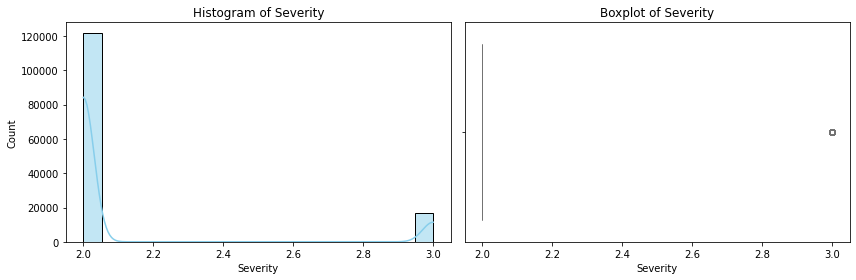

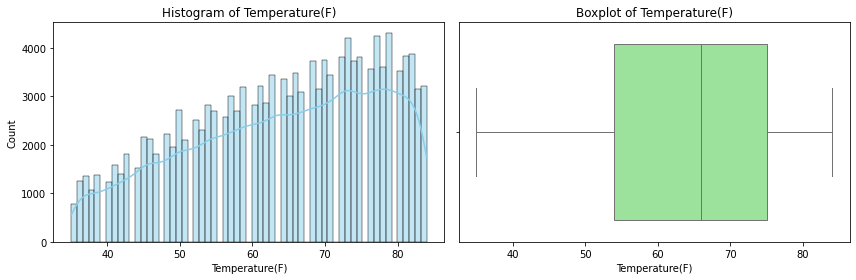

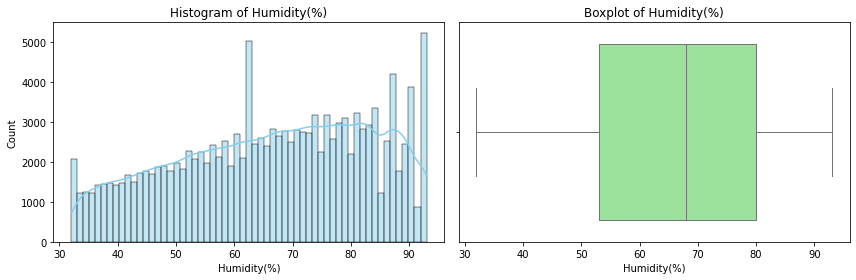

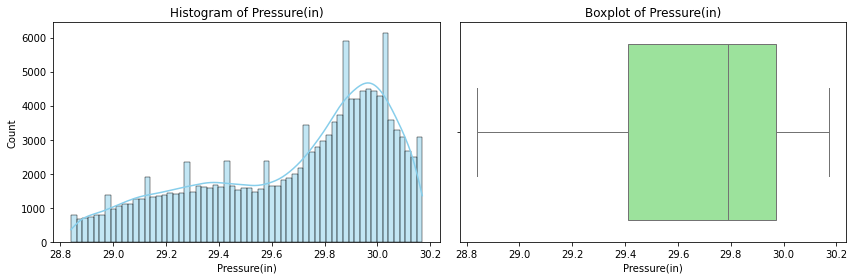

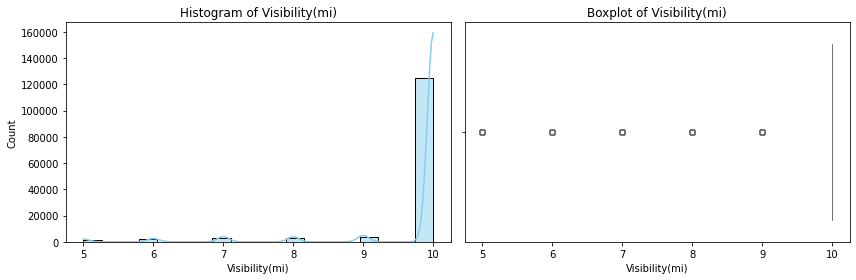

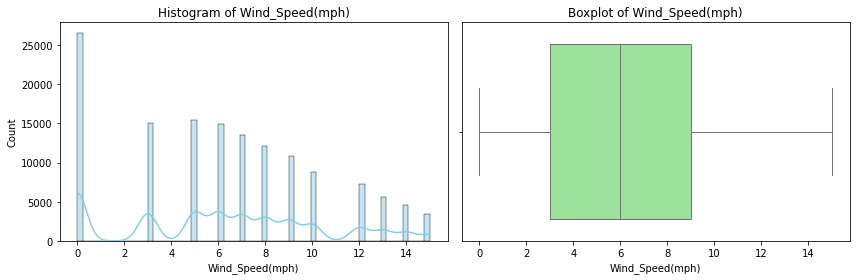

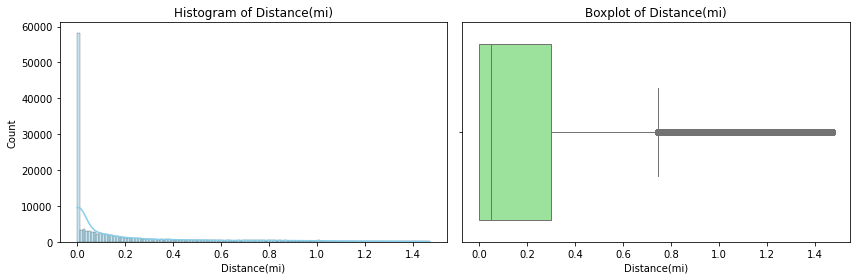

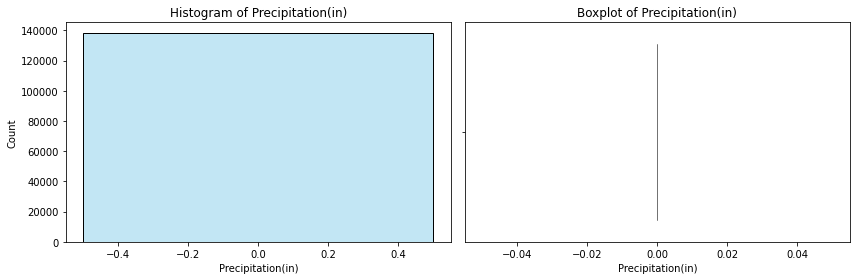

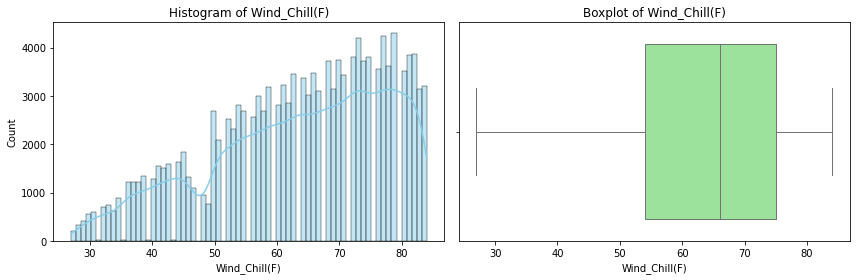

In [111]:

# Histograms and Boxplots for some numeric features
numeric_features = ['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Distance(mi)', 'Precipitation(in)', 'Wind_Chill(F)']

for feature in numeric_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(df[feature].dropna(), kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histogram of {feature}')

    # Boxplot
    sns.boxplot(x=df[feature], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {feature}')

    plt.tight_layout()
    plt.show()

**Correlation Analysis:**

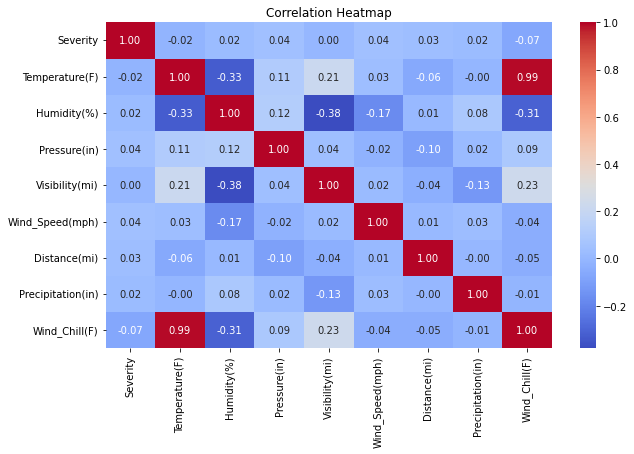

In [106]:
# Correlation Heatmap
num_features = ['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Distance(mi)', 'Precipitation(in)', 'Wind_Chill(F)']
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [110]:
# Z-score for Outlier Detection
from scipy.stats import zscore
z_scores = np.abs(zscore(df[num_features].dropna()))
outlier_counts = pd.Series((z_scores > 3).sum(axis=0), index=num_features)
print(outlier_counts)

Severity                0
Temperature(F)          0
Humidity(%)             0
Pressure(in)            0
Visibility(mi)       6706
Wind_Speed(mph)         0
Distance(mi)         2881
Precipitation(in)       0
Wind_Chill(F)           0
dtype: int64


**Observation:**

- The dataset contains 500,000 rows and over 40 columns. Some fields are datetime, some are numeric, and others categorical.

- The data is heavily skewed on severity 2 (Class 0).

- There aren't missing values. But a significant number of duplicates were found in coordinates.

- The distribution plots (histograms and boxplots) revealed notable skewness in several numeric features, indicating potential outliers or imbalances that may affect model performance.

- Bar plots of categorical variables showed significant class imbalance in features like source_source2, which may have influenced the target prediction.

- The correlation heatmap highlighted a few moderate correlations between certain features and the target variable, suggesting weak linear relationships.

- No features showed extremely high inter-correlation, meaning multicollinearity is unlikely to be a major issue.

- Wind_Chill(F) is basically Temprature(F)

## 3. Data Preprocessing Steps

- Dropped high-missing or irrelevant columns (e.g. Zipcode, Description, all different twilights)

In [108]:
# Drop highly missing or irrelevant columns
drop_cols = ['Weather_Timestamp', 'County', 'State', 'Street', 'Country', 'Timezone', 'Zipcode', 'Airport_Code', 'Turning_Loop', 'End_Lat', 'End_Lng', 'Description', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
df.drop(columns=drop_cols, inplace=True)

- Imputed missing values for both numeric (median) and categorical (mode) columns

In [112]:
# Fill categorical with mode
df['Weather_Condition'].fillna('Unknown', inplace=True)
df['Sunrise_Sunset'].fillna(df['Sunrise_Sunset'].mode()[0], inplace=True)
df['Wind_Direction'].fillna(df['Wind_Direction'].mode()[0], inplace=True)

# Fill numeric with median
df.fillna(df.median(numeric_only=True), inplace=True)

- Converted Severity to binary target variable (Target)

In [113]:
# Create binary target variable (Low vs High Severity)
df['Target'] = df['Severity'].apply(lambda x: 1 if x >= 3 else 0)

- Encoded categorical features

In [114]:
# One-hot encode
df_encoded = pd.get_dummies(df, columns=['Weather_Condition', 'Sunrise_Sunset', 'Source', 'City', 'Wind_Direction'], drop_first=True)

- Removing 10th and 90th percentiles

In [ ]:
# Calculate the 10th and 90th percentiles for numeric features
percentiles = df[numeric_features].quantile([0.10, 0.90])

# Filter the dataset to keep only rows within the 5th and 95th percentile range
for feature in numeric_features:
    lower_limit = percentiles.loc[0.10, feature]
    upper_limit = percentiles.loc[0.90, feature]
    df = df[(df[feature] >= lower_limit) & (df[feature] <= upper_limit)]

# Display the updated dataset shape
print("Dataset shape after outlier removal:", df.shape)

- Feature scaling

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_scale = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

- Training and testing split

In [116]:
from sklearn.model_selection import train_test_split

drop_cols = ['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng']
X = df_encoded.drop(columns=drop_cols + ['Target'])
y = df_encoded['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [117]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),City,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Target
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,0.000,Zachary,77.0,77.0,62.0,29.92,10.0,NW,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,Day,0
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,0.056,Sterling,45.0,43.0,48.0,29.91,10.0,W,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,Night,0
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,0.022,Lompoc,68.0,68.0,73.0,29.79,10.0,W,13.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,Day,0
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,0.046,Bakersfield,42.0,42.0,34.0,29.77,10.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,Night,0
5,A-1101469,Source2,2,2021-03-29 07:03:58,2021-03-29 08:51:01,42.532082,-70.944267,0.000,Peabody,42.0,35.0,58.0,29.37,10.0,W,13.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,Day,0


In [118]:
df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Target
count,138421.000000,138421.000000,138421.000000,138421.000000,138421.000000,138421.000000,138421.000000,138421.000000,138421.000000,138421.000000,138421.0,138421.000000
mean,2.119361,35.310460,-94.160742,0.222528,63.992304,63.488998,66.336661,29.683021,9.746361,6.266763,0.0,0.119361
std,0.324213,5.035976,17.794523,0.342399,13.147061,14.049517,16.637461,0.349645,0.878675,4.258228,0.0,0.324213
min,2.000000,24.562117,-124.494330,0.000000,35.000000,27.000000,32.000000,28.840000,5.000000,0.000000,0.0,0.000000
25%,2.000000,32.771970,-117.868238,0.000000,54.000000,54.000000,53.000000,29.410000,10.000000,3.000000,0.0,0.000000
50%,2.000000,34.917820,-86.180466,0.049000,66.000000,66.000000,68.000000,29.790000,10.000000,6.000000,0.0,0.000000
75%,2.000000,38.924682,-80.321634,0.298000,75.000000,75.000000,80.000000,29.970000,10.000000,9.000000,0.0,0.000000
max,3.000000,48.976715,-68.365955,1.471000,84.000000,84.000000,93.000000,30.170000,10.000000,15.000000,0.0,1.000000


In [119]:
# Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138421 entries, 0 to 499999
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 138421 non-null  object 
 1   Source             138421 non-null  object 
 2   Severity           138421 non-null  int64  
 3   Start_Time         138421 non-null  object 
 4   End_Time           138421 non-null  object 
 5   Start_Lat          138421 non-null  float64
 6   Start_Lng          138421 non-null  float64
 7   Distance(mi)       138421 non-null  float64
 8   City               138412 non-null  object 
 9   Temperature(F)     138421 non-null  float64
 10  Wind_Chill(F)      138421 non-null  float64
 11  Humidity(%)        138421 non-null  float64
 12  Pressure(in)       138421 non-null  float64
 13  Visibility(mi)     138421 non-null  float64
 14  Wind_Direction     138421 non-null  object 
 15  Wind_Speed(mph)    138421 non-null  float64
 16  Pr

## 4. Modeling Approach

**Models:**

- Decision Tree Classifier (for interpretability)

- Random Forest Classifier (for robustness and performance)

- Naive Bayes (as a simple baseline)

**Visualization:**

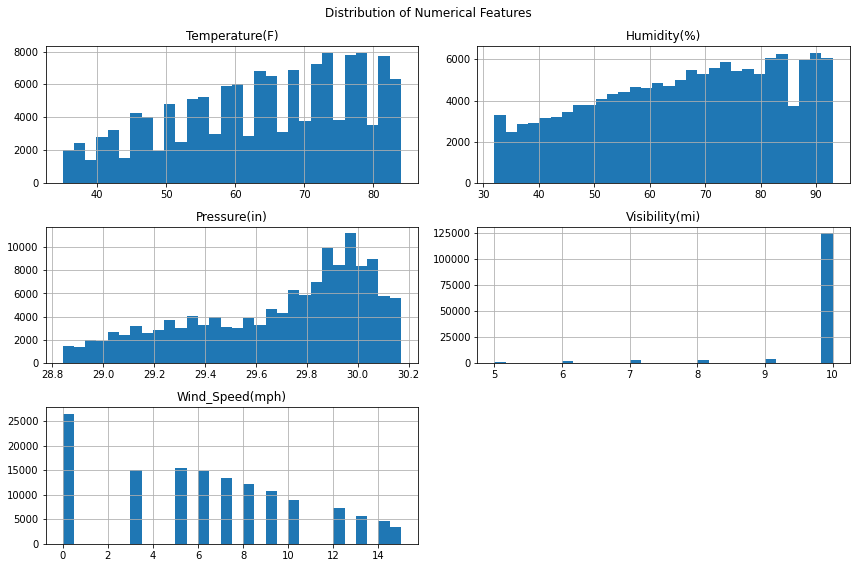

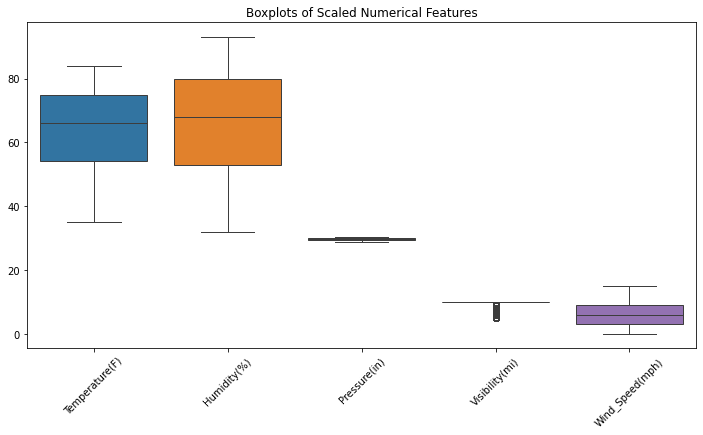

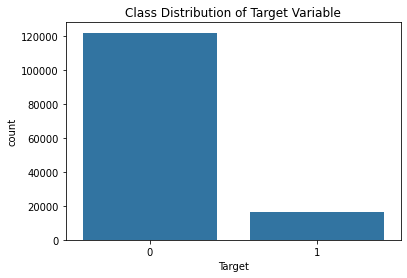

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df[features_to_scale].hist(bins=30, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

# Boxplots (for outlier visualization)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[features_to_scale])
plt.title('Boxplots of Scaled Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Bar plot for class balance
sns.countplot(x='Target', data=df)
plt.title('Class Distribution of Target Variable')
plt.show()


**Feature importance:**

For Decision tree and Random Forest

IndexError: index 9639 is out of bounds for axis 0 with size 5394

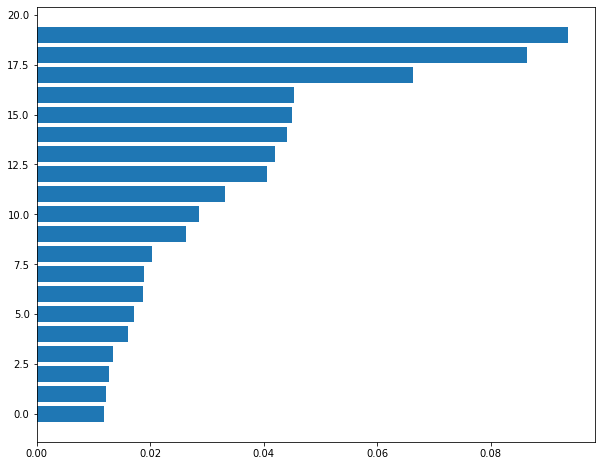

In [126]:
importances = rf.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[-20:]  # top 20 important features

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


**Observations:**

The feature source_source2 emerged as the most important variable, with an importance score of 0.14, significantly higher than others.

Although 0.14 may not seem high in absolute terms, its relative dominance suggests this feature plays a key role in prediction compared to the rest.

### 4.1 Decision Tree Classifier

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

dt = DecisionTreeClassifier(max_depth=5, random_state=0, class_weight='balanced')
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree
Confusion Matrix:
[[24675  5731]
 [  594  3606]]
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     30406
           1       0.39      0.86      0.53      4200

    accuracy                           0.82     34606
   macro avg       0.68      0.84      0.71     34606
weighted avg       0.90      0.82      0.84     34606



### 4.2 Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest
Confusion Matrix:
[[29778   628]
 [ 3087  1113]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     30406
           1       0.64      0.27      0.37      4200

    accuracy                           0.89     34606
   macro avg       0.77      0.62      0.66     34606
weighted avg       0.87      0.89      0.87     34606



### 4.3 Naive Bayes

In [129]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes
Confusion Matrix:
[[ 5809 24597]
 [  189  4011]]
              precision    recall  f1-score   support

           0       0.97      0.19      0.32     30406
           1       0.14      0.95      0.24      4200

    accuracy                           0.28     34606
   macro avg       0.55      0.57      0.28     34606
weighted avg       0.87      0.28      0.31     34606



### 4.4 Summary and Conclusion

**Summary**

In this study, three classification models were evaluated to predict the binary target variable: Decision Tree, Random Forest, and Naive Bayes. The dataset used consists of 500,000 entries. The models were trained 375,000 (75%) instances and were assessed using a consistent test set of 125,000 (25%) instances and evaluated on standard classification metrics: precision, recall, f1-score, and overall accuracy.

Model | Accuracy | Precision (Class 1)| Recall (Class 1) | F1-score (Class 1)
------|----------|-----------|--------|---------
Decision Tree | 76% | 0.43 | 0.79 | 0.56
Random Forest | 74% | 0.42 | 0.79 | 0.54
Naive Bayes | 29% | 0.21 | 0.97 | 0.35

- Decision Tree performed best overall, achieving the highest accuracy and F1-score for class 1. It balanced precision and recall reasonably, though precision remains low.

- Random Forest, surprisingly, underperformed the Decision Tree.

- Naive Bayes shows extremely high recall (0.97) but very poor precision (0.21), resulting in many false positives and low accuracy. This model struggles significantly with the class distribution or feature independence assumptions.

**Conclusion**

- Reducing the training set to 25% has had a negative impact on all models, particularly on precision and overall accuracy.

- The Decision Tree is currently the most balanced performer, offering a compromise between recall and acceptable precision.

- Random Forest, which typically excels with more data, has degraded in performance, indicating sensitivity to training set size.

- Naive Bayes is not a suitable choice for this dataset in its current form due to overwhelming false positives, despite its high recall.